 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [370]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%matplotlib inline

#defining a Debug_Toggle to turn Debugging Printing on/off
debugging_toggle = True

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [371]:
# Read all the CSV datasets to pandas DataFrames

df_returns_whale = pd.read_csv('Resources/whale_returns.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)
df_returns_algo = pd.read_csv('Resources/algo_returns.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)
df_returns_tsx = pd.read_csv('Resources/sp_tsx_history.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)
if (debugging_toggle):
    print(f"=================HEAD: \tPrinting Famous 'Whale' Investor's Portfolios \n {df_returns_whale.head()}")
    print(f"=================TAIL: \tPrinting Famous 'Whale' Investor's Portfolios \n {df_returns_whale.tail()}")
    print(f"=================HEAD  \tIn-house Trading Algorithms from Company \n {df_returns_algo.head()}")
    print(f"=================TAIL: \tIn-house Trading Algorithms from Company \n {df_returns_algo.tail()}")
    print(f"=================HEAD: \tS&P TSX 60 Indexe \n {df_returns_tsx.head()}")
    print(f"=================TAIL: \tS&P TSX 60 Indexe \n {df_returns_tsx.tail()}")

    
# get the shape of the different datasets

dflist = [df_returns_whale, df_returns_algo, df_returns_tsx]
str_dflist = ["Famous 'Whale' Investor's Portfolios", "In-house Trading Algorithms from Company", "S&P TSX 60 Index"]
if (debugging_toggle):
    for i, dfr in enumerate(dflist):
        #This prints the Shape and the Describe() for the Dataframe
        print(f"=================Printing Shapes of {str_dflist[i]}:\t{dflist[i].shape}") 
        print(f"=================Counting Null Values {str_dflist[i]}:\t{dflist[i].isnull().sum().sum()}")               
        print(f"=================Printing Description of {str_dflist[i]}:\n{dflist[i].describe()}")
        print(f"=================Printing Dtypes of {str_dflist[i]}:\n{dflist[i].dtypes}")

#Check dtypes again to make sure that the DateTimeIndex was completed 
if (debugging_toggle):
    for i, dfr in enumerate(dflist):
        #This prints the Dtypes Dataframe
        print(f"=================Printing Dtypes of {str_dflist[i]}:\n{dflist[i].dtypes}")
        

=================HEAD: 	Printing Famous 'Whale' Investor's Portfolios 
             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
=================TAIL: 	Printing Famou

In [372]:
# Reading whale returns

print(f"Printing Shapes of {str_dflist[0]}:\t{dflist[0].shape}") 

Printing Shapes of Famous 'Whale' Investor's Portfolios:	(1060, 4)


In [373]:
# Count nulls

print(f"Counting Null Values {str_dflist[0]}:\t{dflist[0].isnull().sum().sum()}")     


#List of null values:
if (debugging_toggle):
    print(f"=================Printing returns_whale \n {dflist[0].isnull().sum()}")
    print(f"=================Printing returns_whale \n {dflist[0][dflist[0]['SOROS FUND MANAGEMENT LLC'].isnull()]}")


Counting Null Values Famous 'Whale' Investor's Portfolios:	4
=================Printing returns_whale 
 SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
=================Printing returns_whale 
             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [374]:
# Drop nulls
dflist[0].dropna(inplace=True)
#check if there are any Nulls now.
if (debugging_toggle):
    print(f"=================Printing {str_dflist[0]} \n {dflist[0].isnull().sum()}")
    print(f"=================Printing {str_dflist[0]} \n {dflist[0][dflist[0]['SOROS FUND MANAGEMENT LLC'].isnull()]}")
    print(f"=================Printing Shapes of {str_dflist[0]}:\t{dflist[0].shape}") 



=================Printing Famous 'Whale' Investor's Portfolios 
 SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64
=================Printing Famous 'Whale' Investor's Portfolios 
 Empty DataFrame
Columns: [SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC. , TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC]
Index: []
=================Printing Shapes of Famous 'Whale' Investor's Portfolios:	(1059, 4)


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [375]:
# Reading algorithmic returns
print(f"Printing Shapes of {str_dflist[1]}:\t{dflist[1].shape}") 

Printing Shapes of In-house Trading Algorithms from Company:	(1241, 2)


In [376]:
# Count nulls
print(f"Counting Null Values {str_dflist[1]}:\t{dflist[1].isnull().sum().sum()}")    

#List of null values:
if (debugging_toggle):
    print(f"=================Printing returns_whale \n {dflist[1].isnull().sum()}")
    print(f"=================Printing returns_whale \n {dflist[1][dflist[1]['Algo 1'].isnull()]}")
    print(f"=================Printing returns_whale \n {dflist[1][dflist[1]['Algo 2'].isnull()]}")



Counting Null Values In-house Trading Algorithms from Company:	6
=================Printing returns_whale 
 Algo 1    0
Algo 2    6
dtype: int64
=================Printing returns_whale 
 Empty DataFrame
Columns: [Algo 1, Algo 2]
Index: []
=================Printing returns_whale 
               Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN
2014-06-04 -0.001838     NaN


In [377]:
# Drop nulls
dflist[1].dropna(inplace=True)
#check if there are any Nulls now.
if (debugging_toggle):
    print(f"=================Printing {str_dflist[1]} \n {dflist[1].isnull().sum()}")
    print(f"=================Printing {str_dflist[1]} \n {dflist[1][dflist[1]['Algo 2'].isnull()]}")
    print(f"=================Printing Shapes of {str_dflist[1]}:\t{dflist[1].shape}") 



=================Printing In-house Trading Algorithms from Company 
 Algo 1    0
Algo 2    0
dtype: int64
=================Printing In-house Trading Algorithms from Company 
 Empty DataFrame
Columns: [Algo 1, Algo 2]
Index: []
=================Printing Shapes of In-house Trading Algorithms from Company:	(1235, 2)


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [378]:
# Reading S&P TSX 60 Closing Prices
print(f"Printing Shapes of {str_dflist[2]}:\t{dflist[2].shape}") 

Printing Shapes of S&P TSX 60 Index:	(1818, 1)


In [379]:
# Check Data Types
print(f"Printing Dtypes of {str_dflist[2]}:\n{dflist[2].dtypes}")

Printing Dtypes of S&P TSX 60 Index:
Close    object
dtype: object


In [380]:
# Fix Data Types

#we do this by removing the "$" and "," characters from string
#then we typecase the the string o a float
dflist[2]["Close"] = [float((x.replace('$',"")).replace(',',"")) for x in dflist[2]["Close"]]

# Check Data Types to show the change from object to float
print(f"Printing Dtypes of {str_dflist[2]}:\n{dflist[2].dtypes}")

Printing Dtypes of S&P TSX 60 Index:
Close    float64
dtype: object


In [381]:
# Calculate Daily Returns
df_sptsx_change = dflist[2]["Close"].pct_change()
if (debugging_toggle):
    # Check Data Types to show the change from object to float
    print(f"Printing Dtypes of {str_dflist[2]}:\n{dflist[2].dtypes}")
    print(f"Printing Dtypes of df_sptsx_change:\n{df_sptsx_change.dtypes}")
    print(f"=================HEAD: \tS&P TSX 60 Change \n {df_sptsx_change.head()}")
    print(f"=================TAIL: \tS&P TSX 60 Change \n {df_sptsx_change.tail()}")
    print(f"=================DESCRIBE: \tS&P TSX 60 Change \n {df_sptsx_change.describe}")

Printing Dtypes of S&P TSX 60 Index:
Close    float64
dtype: object
Printing Dtypes of df_sptsx_change:
float64
=================HEAD: 	S&P TSX 60 Change 
 Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
Name: Close, dtype: float64
=================TAIL: 	S&P TSX 60 Change 
 Date
2019-12-20    0.003188
2019-12-23    0.000600
2019-12-24    0.003003
2019-12-27   -0.000695
2019-12-30   -0.004057
Name: Close, dtype: float64
=================DESCRIBE: 	S&P TSX 60 Change 
 <bound method NDFrame.describe of Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
                ...   
2019-12-20    0.003188
2019-12-23    0.000600
2019-12-24    0.003003
2019-12-27   -0.000695
2019-12-30   -0.004057
Name: Close, Length: 1818, dtype: float64>


In [382]:
# Drop nulls

# Count nulls
print(f"Counting Null Values S&P TSX 60 Change:\t{df_sptsx_change.isnull().sum().sum()}")    

#List of null values:
if (debugging_toggle):
    print(f"=================Printing returns_whale \n {df_sptsx_change.isnull().sum()}")


# Drop nulls    
df_sptsx_change.dropna(inplace=True)

#check if there are any Nulls now.
if (debugging_toggle):
    print(f"=================Printing S&P TSX 60 Change:\n {df_sptsx_change.isnull().sum()}")


Counting Null Values S&P TSX 60 Change:	1
=================Printing returns_whale 
 1
=================Printing S&P TSX 60 Change:
 0


In [383]:



if (debugging_toggle):
    print(f"=================HEAD: \tS&P TSX 60 Index \n {dflist[2].head()}")
    print(f"=================TAIL: \tS&P TSX 60 Index \n {dflist[2].tail()}")

=================HEAD: 	S&P TSX 60 Index 
                Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99
=================TAIL: 	S&P TSX 60 Index 
                Close
Date                
2019-12-20  17118.44
2019-12-23  17128.71
2019-12-24  17180.15
2019-12-27  17168.21
2019-12-30  17098.56


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [384]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
#combined_df = pd.concat([Whales_df, Algo_df, daily_return], axis = 'columns', join = 'inner')
#combined_df.head()

#df_consolidated = dflist[0].merge(dflist[1], how="left", on="Date").dropna()
#df_consolidated = df_consolidated.merge(dflist[2], how="left",on='Date').dropna()  

df_consolidated = pd.concat([dflist[0],dflist[1],df_sptsx_change], axis = 'columns', join = 'inner')

# Rename `Close` Column to be specific to this portfolio.
df_consolidated.rename(columns={'Close':'S&P TSX 60'},inplace=True)

if (debugging_toggle):
    print(f"=================Printing Shapes of {df_consolidated.shape}")              
    print(f"=================Printing Dtypes of {df_consolidated.dtypes}")
    print(f"=================HEAD: DF_CONSOLIDATED \n {df_consolidated.head()}")
    print(f"=================TAIL: DF_CONSOLIDATED \n {df_consolidated.tail()}")

=================Printing Shapes of (1029, 7)
=================Printing Dtypes of SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
S&P TSX 60                     float64
dtype: object
=================HEAD: DF_CONSOLIDATED 
             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

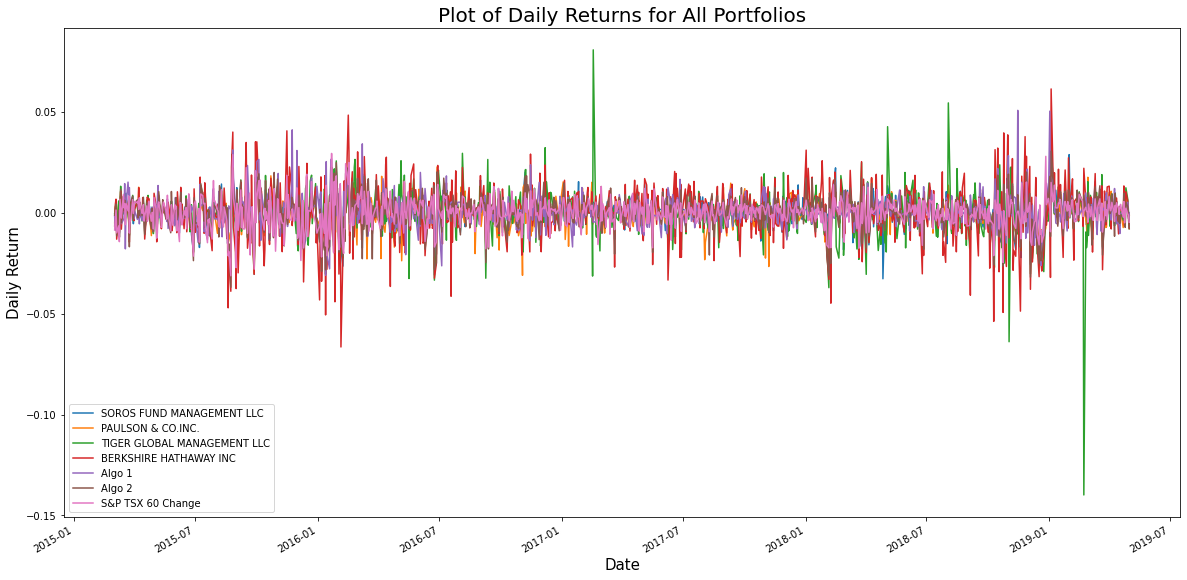

In [385]:
# Plot daily returns of all portfolios
df_consolidated.plot(figsize=(20,10))
plt.title('Plot of Daily Returns for All Portfolios', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily Return', fontsize=15)
plt.legend(portfolio_items, loc="lower left", fontsize=10)

#### Calculate and Plot cumulative returns.

=================HEAD:             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                   0.998734            0.995019   
2015-03-04                   1.000962            0.998245   
2015-03-05                   1.004981            1.002314   
2015-03-06                   0.997037            0.998731   
2015-03-09                   0.997617            1.002951   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                     0.999504                0.993431  0.998058   
2015-03-04                     0.996972                0.997617  0.989486   
2015-03-05                     0.999319                1.004327  0.988541   
2015-03-06                     0.990844                0.991172  0.983641   
2015-03-09                     0.996633                0.989534  0.978283   

         

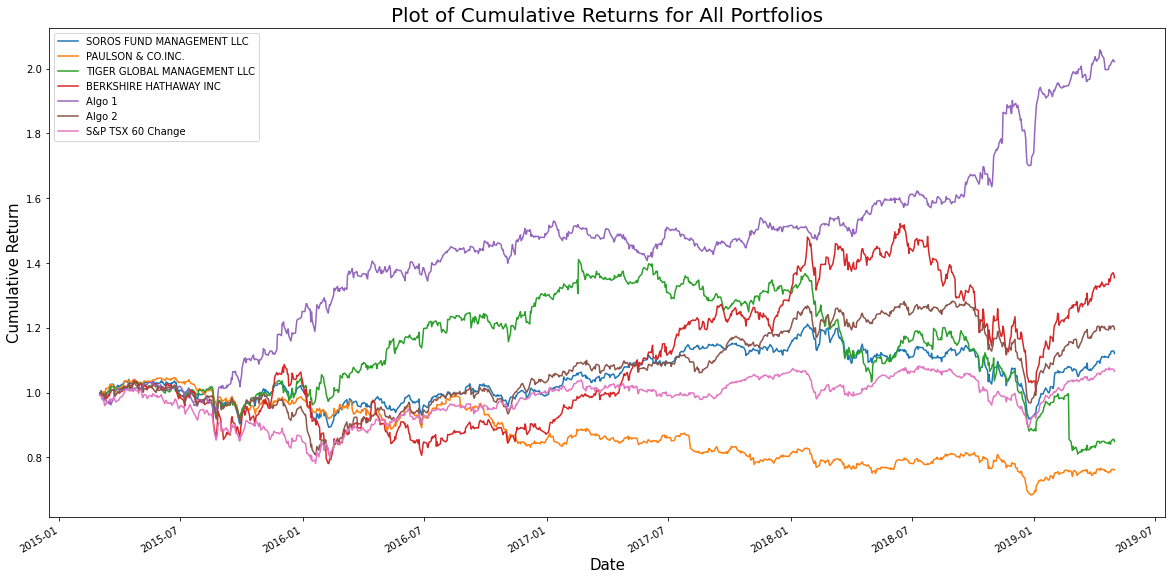

In [386]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
df_consolidated_cumulative_returns = (1 + df_consolidated).cumprod()

if (debugging_toggle):
    print(f"=================HEAD: {df_consolidated_cumulative_returns.head()}")

df_consolidated_cumulative_returns.plot(figsize=(20,10))
plt.title('Plot of Cumulative Returns for All Portfolios', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cumulative Return', fontsize=15)
plt.legend(portfolio_items, loc="upper left", fontsize=10)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


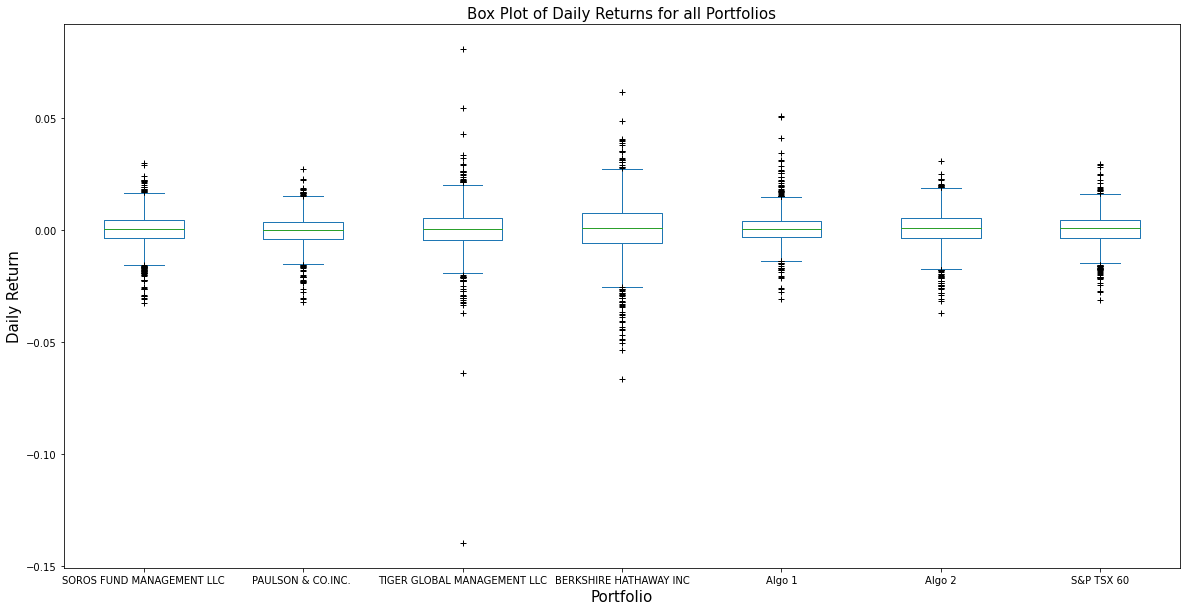

In [387]:
# Box plot to visually show risk


df_consolidated.plot.box(figsize=(20,10),sym='+')
plt.title('Box Plot of Daily Returns for all Portfolios', fontsize = 15)
plt.xlabel('Portfolio', fontsize = 15)
plt.ylabel('Daily Return', fontsize = 15)
plt.show()

### Calculate Standard Deviations

In [388]:
# Calculate the daily standard deviations of all portfolios
daily_std_deviations = df_consolidated.std().sort_values(ascending=False)
print(f"The daily standard deviations of all portfolios is listed below: \n{daily_std}")

The daily standard deviations of all portfolios is listed below: 
BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60                     0.007034
PAULSON & CO.INC.              0.006982
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [389]:
# Calculate  the daily standard deviation of S&P TSX 60
print(f"The daily standard deviations of S&P TSX 60: {daily_std_deviations['S&P TSX 60']}")


# Determine which portfolios are riskier than the S&P TSX 60
print(f"\nThe below portfolios are riskier than the S&P TSX 60")
for portfolio in df_consolidated.columns:
    if daily_std_deviations[portfolio] > daily_std_deviations['S&P TSX 60']: 
        print(f"\t {portfolio}")

The daily standard deviations of S&P TSX 60: 0.007034167748577725

The below portfolios are riskier than the S&P TSX 60
	 SOROS FUND MANAGEMENT LLC
	 TIGER GLOBAL MANAGEMENT LLC
	 BERKSHIRE HATHAWAY INC
	 Algo 1
	 Algo 2


### Calculate the Annualized Standard Deviation

In [390]:
# Calculate the annualized standard deviation (252 trading days)

df_annualized_std_deviations = daily_std_deviations*np.sqrt(252)
df_annualized_std_deviations.sort_values(ascending=False)

print(f"The annualized standard deviation (252 trading days): \n{df_annualized_std_deviations}")

The annualized standard deviation (252 trading days): 
BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60                     0.111664
PAULSON & CO.INC.              0.110841
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

For Later Reference: Here we use the [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)

<AxesSubplot:xlabel='Date'>

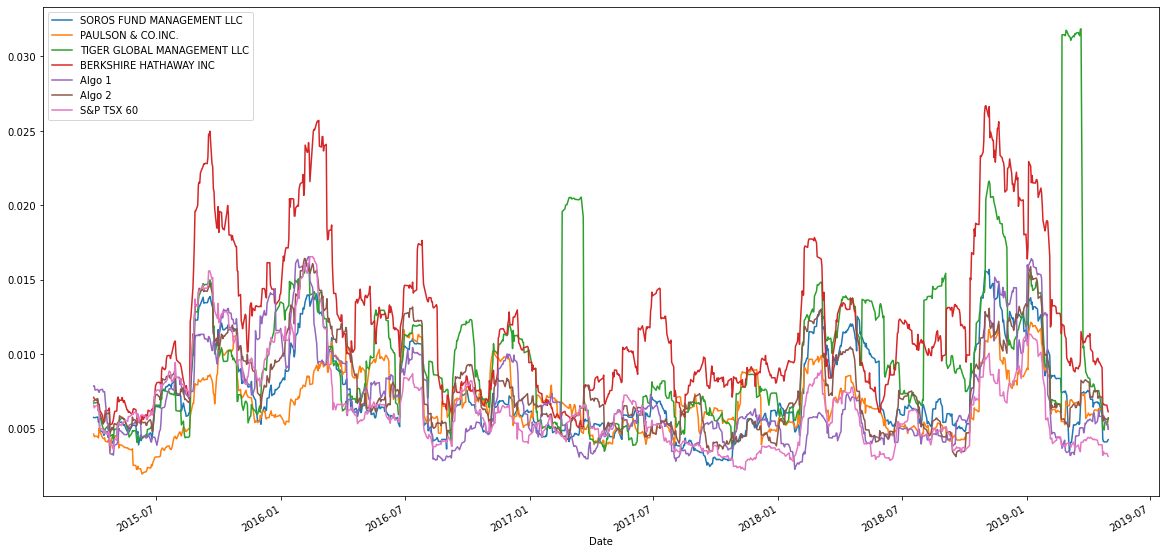

In [391]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_rolling_21_day_std_deviations = df_consolidated.rolling(window=21).std()

# Plot the rolling standard deviation
df_rolling_21_day_std_deviations.plot(figsize=(20,10))

### Calculate and plot the correlation

For Later Reference: Here we use the 
* [pandas.DataFrame.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
* [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [392]:
# Calculate the correlation

df_correlation = df_consolidated.corr()

# Display the correlation matrix
print(f"The correlation matrix for the portfolios:\n")
df_correlation


The correlation matrix for the portfolios:



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


Text(0.5, 1.0, 'Correlation')

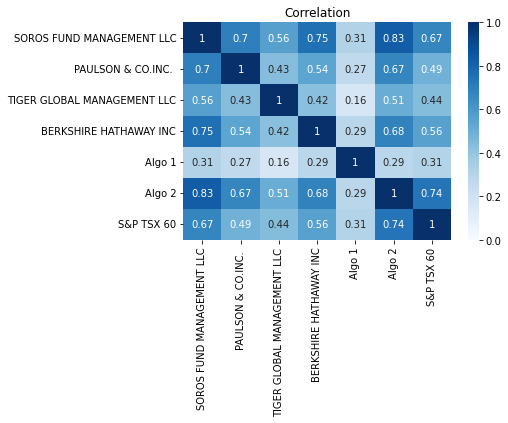

In [393]:
sns.heatmap(df_correlation, vmin=0, vmax=1, cmap="Blues", annot=True).set_title("Correlation")

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX


For Later Reference: Here we use the 
* [pandas.DataFrame.cov](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html)
* [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)
* [pandas.DataFrame.var](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html)

SOROS FUND MANAGEMENT LLC: 
		 0.00003710689907855224
PAULSON & CO.INC. : 
		 0.00002389491656361342
TIGER GLOBAL MANAGEMENT LLC: 
		 0.00003372724149435499
BERKSHIRE HATHAWAY INC: 
		 0.00005027336077110012
Algo 1: 
		 0.00001656300030891137
Algo 2: 
		 0.00004318704430084255
S&P TSX 60: 
		 0.00004947951591513092
Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2015-07-21    0.000047
2015-07-22    0.000047
2015-07-23    0.000047
2015-07-24    0.000047
2015-07-27    0.000049
Name: S&P TSX 60, Length: 100, dtype: float64


<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC Beta'}, xlabel='Date'>

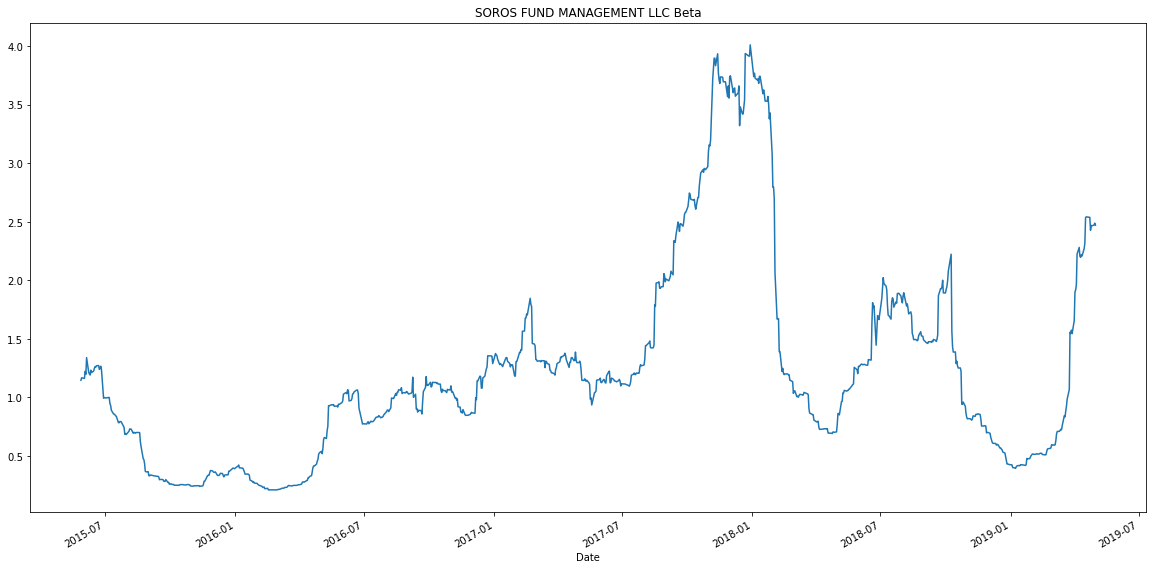

In [394]:
# Calculate covariance of all portfolio
df_covariances = []
for i in range(0,len(df_consolidated.columns)):
    df_covariances.append(df_consolidated[df_consolidated.columns[i]].cov(df_consolidated['S&P TSX 60']))

#Printing covariances
j = 0
for i in df_covariances:
    print(f"{df_consolidated.columns[j]}: \n\t\t {i:.20f}")
    j = j+ 1


# Calculate variance of S&P TSX
df_variance_sp_tsx_60 = df_consolidated['S&P TSX 60'].rolling(window=60).var()
if (debugging_toggle):
    print(df_variance_sp_tsx_60.head(100))

# Computing beta
df_beta = df_covariances[0]/df_variance_sp_tsx_60


# Plot beta trend
df_beta.plot(title="SOROS FUND MANAGEMENT LLC Beta",figsize=(20, 10))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

For Later Reference: Here we use the [pandas.DataFrame.ewm](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html)

<AxesSubplot:title={'center':'Exponentially Weighted Average (21 Day Half life)'}, xlabel='Date'>

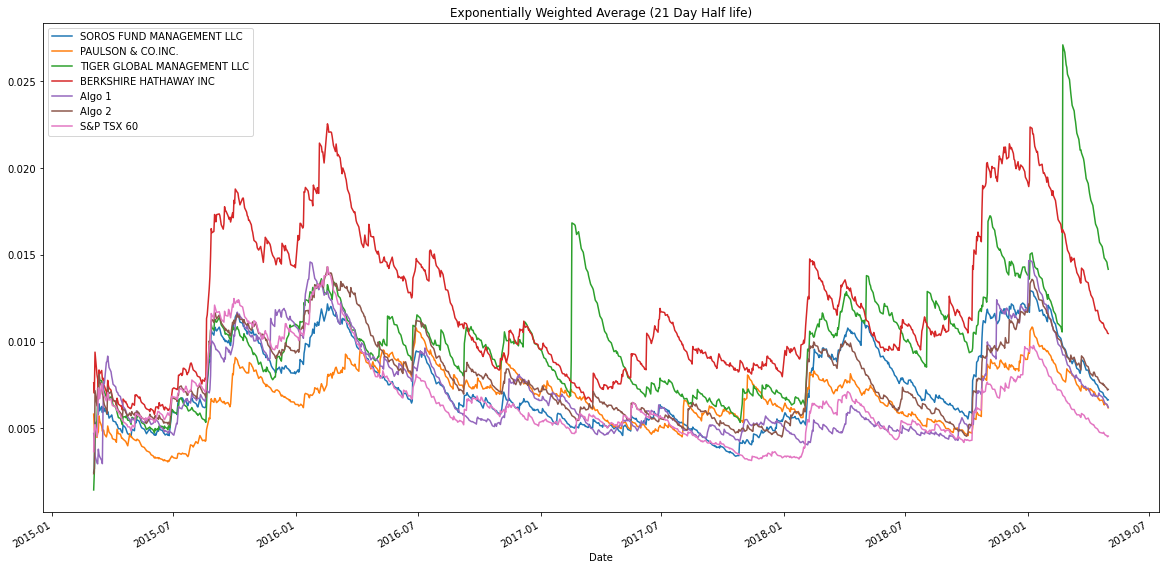

In [395]:
# Use `ewm` to calculate the rolling window
df_rolling_ewa = df_consolidated.ewm(halflife=21,adjust=True).std()
df_rolling_ewa.plot(title="Exponentially Weighted Average (21 Day Half life)", figsize=(20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [396]:
# Annualized Sharpe Ratios
#Here we treat the risk-free return to be zero!
sharpe_ratios = ((df_consolidated.mean() - 0) * 252) / (df_consolidated.std() * np.sqrt(252))

sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharp Ratios'}>

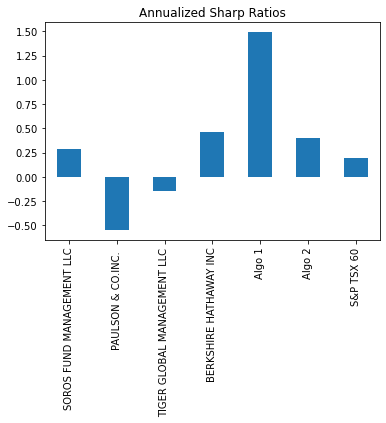

In [397]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Annualized Sharp Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

In general - judging by the Sharpe Ratio Alone - only Algo 1 is "Good" with its ratio close to 1.5.

Based on the information we have the algorithmic strategies have outperformed the market (S&P TSX 60)
However, when compared to the whales portfolios, the algorithmic strategies have mized results. *Algo 1* has outperformed but *Algo 2* has not outperformed.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [398]:
# Reading data from 1st stock
df_returns_vgt = pd.read_csv('Resources/Fintech-Assignment-MyPortfolio-VGT.csv', infer_datetime_format=True, parse_dates=True)

if (debugging_toggle):
    print(f"=================HEAD: \tPrinting MyPortfolio-VGT \n {df_returns_vgt.head()}")
    print(f"=================TAIL: \tPrinting MyPortfolio-VGT \n {df_returns_vgt.tail()}")
df_returns_vgt["Date"] = df_returns_vgt["Date"].str.replace(" 16:00:00","")
df_returns_vgt["Date"] = pd.to_datetime(df_returns_vgt["Date"], yearfirst=True, infer_datetime_format=True)
df_returns_vgt = df_returns_vgt.set_index("Date")
df_returns_vgt.rename(columns={'Close':'VGT'},inplace=True)

if (debugging_toggle):
    print(f"=================HEAD: \tPrinting MyPortfolio-VGT \n {df_returns_vgt.head()}")
    print(f"=================TAIL: \tPrinting MyPortfolio-VGT \n {df_returns_vgt.tail()}")

=================HEAD: 	Printing MyPortfolio-VGT 
                  Date   Close
0  3/16/2015 16:00:00  106.84
1  3/17/2015 16:00:00  106.95
2  3/18/2015 16:00:00  108.24
3  3/19/2015 16:00:00  108.15
4  3/20/2015 16:00:00  108.77
=================TAIL: 	Printing MyPortfolio-VGT 
                     Date   Close
1762  3/14/2022 16:00:00  366.81
1763  3/15/2022 16:00:00  379.14
1764  3/16/2022 16:00:00  393.02
1765  3/17/2022 16:00:00  397.29
1766  3/18/2022 16:00:00  406.39
=================HEAD: 	Printing MyPortfolio-VGT 
                VGT
Date              
2015-03-16  106.84
2015-03-17  106.95
2015-03-18  108.24
2015-03-19  108.15
2015-03-20  108.77
=================TAIL: 	Printing MyPortfolio-VGT 
                VGT
Date              
2022-03-14  366.81
2022-03-15  379.14
2022-03-16  393.02
2022-03-17  397.29
2022-03-18  406.39


In [399]:
# Reading data from 2nd stock
df_returns_zeb = pd.read_csv('Resources/Fintech-Assignment-MyPortfolio-ZEB.csv', infer_datetime_format=True, parse_dates=True)
df_returns_zeb["Date"] = df_returns_zeb["Date"].str.replace(" 16:00:00","")
df_returns_zeb["Date"] = pd.to_datetime(df_returns_zeb["Date"], yearfirst=True, infer_datetime_format=True)
df_returns_zeb = df_returns_zeb.set_index("Date")
df_returns_zeb.rename(columns={'Close':'ZEB'},inplace=True)
if (debugging_toggle):
    print(f"=================HEAD  \tPrinting MyPortfolio-ZEB \n {df_returns_zeb.head()}")
    print(f"=================TAIL: \tPrinting MyPortfolio-ZEB \n {df_returns_zeb.tail()}")
    


=================HEAD  	Printing MyPortfolio-ZEB 
               ZEB
Date             
2015-03-16  22.25
2015-03-17  22.17
2015-03-18  22.14
2015-03-19  21.96
2015-03-20  22.28
=================TAIL: 	Printing MyPortfolio-ZEB 
               ZEB
Date             
2022-03-14  40.75
2022-03-15  40.75
2022-03-16  41.28
2022-03-17  41.45
2022-03-18  41.59


In [400]:
# Reading data from 3rd stock
df_returns_div = pd.read_csv('Resources/Fintech-Assignment-MyPortfolio-DIV.csv', infer_datetime_format=True, parse_dates=True)
df_returns_div.rename(columns={'Close':'DIV'},inplace=True)
df_returns_div["Date"] = df_returns_div["Date"].str.replace(" 16:00:00","")
df_returns_div["Date"] = pd.to_datetime(df_returns_div["Date"], yearfirst=True, infer_datetime_format=True)
df_returns_div = df_returns_div.set_index("Date")

if (debugging_toggle):
    print(f"=================HEAD: \tPrinting MyPortfolio-DIV \n {df_returns_div.head()}")
    print(f"=================TAIL: \tPrinting MyPortfolio-DIV \n {df_returns_div.tail()}")
    


=================HEAD: 	Printing MyPortfolio-DIV 
               DIV
Date             
2015-03-16  27.83
2015-03-17  27.91
2015-03-18  28.37
2015-03-19  28.21
2015-03-20  28.50
=================TAIL: 	Printing MyPortfolio-DIV 
               DIV
Date             
2022-03-14  20.18
2022-03-15  20.28
2022-03-16  20.36
2022-03-17  20.53
2022-03-18  20.57


In [401]:
# Combine all stocks in a single DataFrame
df_combined__my_portfolio_data = pd.concat([df_returns_div, df_returns_vgt, df_returns_zeb], axis="columns", join="inner")
if (debugging_toggle):
    print(f"=================HEAD: \tPrinting MyPortfolio-DIV \n {df_combined__my_portfolio_data.head()}")
    print(f"=================TAIL: \tPrinting MyPortfolio-DIV \n {df_combined__my_portfolio_data.tail()}")

=================HEAD: 	Printing MyPortfolio-DIV 
               DIV     VGT    ZEB
Date                            
2015-03-16  27.83  106.84  22.25
2015-03-17  27.91  106.95  22.17
2015-03-18  28.37  108.24  22.14
2015-03-19  28.21  108.15  21.96
2015-03-20  28.50  108.77  22.28
=================TAIL: 	Printing MyPortfolio-DIV 
               DIV     VGT    ZEB
Date                            
2022-03-14  20.18  366.81  40.75
2022-03-15  20.28  379.14  40.75
2022-03-16  20.36  393.02  41.28
2022-03-17  20.53  397.29  41.45
2022-03-18  20.57  406.39  41.59


In [402]:
# Reset Date index
#df_combined__my_portfolio_data.reset_index(inplace=True)
df_combined__my_portfolio_data.index = df_combined__my_portfolio_data.index.date

if (debugging_toggle):
    print(f"=================HEAD: \tPrinting MyPortfolio-DIV \n {df_combined__my_portfolio_data.head(10)}")
    print(f"=================TAIL: \tPrinting MyPortfolio-DIV \n {df_combined__my_portfolio_data.tail(10)}")

=================HEAD: 	Printing MyPortfolio-DIV 
               DIV     VGT    ZEB
2015-03-16  27.83  106.84  22.25
2015-03-17  27.91  106.95  22.17
2015-03-18  28.37  108.24  22.14
2015-03-19  28.21  108.15  21.96
2015-03-20  28.50  108.77  22.28
2015-03-23  28.60  108.80  22.35
2015-03-24  28.43  108.50  22.48
2015-03-25  28.22  105.52  22.31
2015-03-26  28.12  105.59  22.08
2015-03-27  28.16  105.85  21.91
=================TAIL: 	Printing MyPortfolio-DIV 
               DIV     VGT    ZEB
2022-03-07  20.58  375.53  39.87
2022-03-08  20.57  373.68  39.66
2022-03-09  20.54  389.61  40.55
2022-03-10  20.52  382.88  40.47
2022-03-11  20.34  374.92  40.40
2022-03-14  20.18  366.81  40.75
2022-03-15  20.28  379.14  40.75
2022-03-16  20.36  393.02  41.28
2022-03-17  20.53  397.29  41.45
2022-03-18  20.57  406.39  41.59


In [403]:
# Calculate daily returns

df_combined__my_portfolio_data['DIV'] = df_combined__my_portfolio_data['DIV'].pct_change()
df_combined__my_portfolio_data['VGT'] = df_combined__my_portfolio_data['VGT'].pct_change()
df_combined__my_portfolio_data['ZEB'] = df_combined__my_portfolio_data['ZEB'].pct_change()

# Drop NAs

df_combined__my_portfolio_data.dropna(inplace=True)

# Display sample data

if (debugging_toggle):
    print(f"=================HEAD: \tPrinting MyPortfolio-DIV \n {df_combined__my_portfolio_data.head(10)}")
    print(f"=================TAIL: \tPrinting MyPortfolio-DIV \n {df_combined__my_portfolio_data.tail(10)}")

=================HEAD: 	Printing MyPortfolio-DIV 
                  DIV       VGT       ZEB
2015-03-17  0.002875  0.001030 -0.003596
2015-03-18  0.016482  0.012062 -0.001353
2015-03-19 -0.005640 -0.000831 -0.008130
2015-03-20  0.010280  0.005733  0.014572
2015-03-23  0.003509  0.000276  0.003142
2015-03-24 -0.005944 -0.002757  0.005817
2015-03-25 -0.007387 -0.027465 -0.007562
2015-03-26 -0.003544  0.000663 -0.010309
2015-03-27  0.001422  0.002462 -0.007699
2015-03-30  0.005327  0.011337  0.000913
=================TAIL: 	Printing MyPortfolio-DIV 
                  DIV       VGT       ZEB
2022-03-07 -0.007236 -0.037497 -0.018705
2022-03-08 -0.000486 -0.004926 -0.005267
2022-03-09 -0.001458  0.042630  0.022441
2022-03-10 -0.000974 -0.017274 -0.001973
2022-03-11 -0.008772 -0.020790 -0.001730
2022-03-14 -0.007866 -0.021631  0.008663
2022-03-15  0.004955  0.033614  0.000000
2022-03-16  0.003945  0.036609  0.013006
2022-03-17  0.008350  0.010865  0.004118
2022-03-18  0.001948  0.022905  0.003

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [404]:
# Set weights
weights = [1/3, 1/3, 1/3]

if (debugging_toggle):
    print(weights)
# Calculate portfolio return
df_my_portfolio_weighted_returns = df_combined__my_portfolio_data.dot(weights)
df_my_portfolio_weighted_returns.dropna(inplace=True)
# Display sample data
if (debugging_toggle):
    print(f"=================HEAD: \tPrinting df_my_portfolio_weighted_returns \n{df_my_portfolio_weighted_returns.head()}")
    print(f"=================TAIL: \tPrinting df_my_portfolio_weighted_returns \n{df_my_portfolio_weighted_returns.tail()}")
    print(f"=================DTYPES: \tPrinting df_my_portfolio_weighted_returns \n{df_my_portfolio_weighted_returns.dtypes}")
    print(f"=================TYPE: \tPrinting df_my_portfolio_weighted_returns \n{type(df_my_portfolio_weighted_returns)}")
    print(f"=================HEAD: \tPrinting df_consolidated \n{df_consolidated.head()}")
    print(f"=================TAIL: \tPrinting df_consolidated \n{df_consolidated.tail()}")    

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
=================HEAD: 	Printing df_my_portfolio_weighted_returns 
2015-03-17    0.000103
2015-03-18    0.009063
2015-03-19   -0.004867
2015-03-20    0.010195
2015-03-23    0.002309
dtype: float64
=================TAIL: 	Printing df_my_portfolio_weighted_returns 
2022-03-14   -0.006945
2022-03-15    0.012857
2022-03-16    0.017853
2022-03-17    0.007778
2022-03-18    0.009410
dtype: float64
=================DTYPES: 	Printing df_my_portfolio_weighted_returns 
float64
=================TYPE: 	Printing df_my_portfolio_weighted_returns 
<class 'pandas.core.series.Series'>
=================HEAD: 	Printing df_consolidated 
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [405]:
# Join your returns DataFrame to the original returns DataFrame

df_consolidated_returns_incl_my_portfolio = pd.concat([df_my_portfolio_weighted_returns,df_consolidated], axis = 'columns', join = 'inner')
df_consolidated_returns_incl_my_portfolio.rename(columns={0: "My Portfolio"}, inplace=True)
if (debugging_toggle):    
    print(f"=================HEAD: \tPrinting df_consolidated_returns_incl_my_portfolio \n {df_consolidated_returns_incl_my_portfolio.head()}")
    print(f"=================TAIL: \tPrinting df_consolidated_returns_incl_my_portfolio \n {df_consolidated_returns_incl_my_portfolio.tail()}")    

=================HEAD: 	Printing df_consolidated_returns_incl_my_portfolio 
             My Portfolio  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2015-03-17      0.000103                   0.002142            0.002928   
2015-03-18      0.009063                   0.009603            0.007513   
2015-03-19     -0.004867                  -0.000778           -0.002554   
2015-03-20      0.010195                   0.009657            0.000983   
2015-03-23      0.002309                  -0.000067           -0.000513   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2015-03-17                    -0.000687                0.000384 -0.002822   
2015-03-18                     0.009557                0.007854  0.014429   
2015-03-19                    -0.002925                0.002363 -0.017888   
2015-03-20                     0.007391                0.007105  0.003834   
2015-03-23                    -0.000109                0.000591  0.015172   

         

/Users/satishsurath/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:347: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


In [406]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

df_consolidated_returns_incl_my_portfolio.dropna(inplace=True)
if (debugging_toggle):    
    print(f"=================HEAD: \tPrinting df_consolidated_returns_incl_my_portfolio \n {df_consolidated_returns_incl_my_portfolio.head()}")
    print(f"=================TAIL: \tPrinting df_consolidated_returns_incl_my_portfolio \n {df_consolidated_returns_incl_my_portfolio.tail()}")   

=================HEAD: 	Printing df_consolidated_returns_incl_my_portfolio 
             My Portfolio  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2015-03-17      0.000103                   0.002142            0.002928   
2015-03-18      0.009063                   0.009603            0.007513   
2015-03-19     -0.004867                  -0.000778           -0.002554   
2015-03-20      0.010195                   0.009657            0.000983   
2015-03-23      0.002309                  -0.000067           -0.000513   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2015-03-17                    -0.000687                0.000384 -0.002822   
2015-03-18                     0.009557                0.007854  0.014429   
2015-03-19                    -0.002925                0.002363 -0.017888   
2015-03-20                     0.007391                0.007105  0.003834   
2015-03-23                    -0.000109                0.000591  0.015172   

         

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [407]:
# Calculate the annualized `std`
daily_std_deviations = df_consolidated_returns_incl_my_portfolio.std()
print(f"The daily standard deviations of all portfolios is listed below: \n{daily_std_deviations}")
df_annualized_std_deviations = daily_std_deviations*np.sqrt(252)
df_annualized_std_deviations.sort_values(ascending=False)
print(f"\n\nThe annualized standard deviation (252 trading days): \n{df_annualized_std_deviations}")

The daily standard deviations of all portfolios is listed below: 
My Portfolio                   0.007156
SOROS FUND MANAGEMENT LLC      0.007841
PAULSON & CO.INC.              0.007009
TIGER GLOBAL MANAGEMENT LLC    0.010921
BERKSHIRE HATHAWAY INC         0.012849
Algo 1                         0.007619
Algo 2                         0.008334
S&P TSX 60                     0.007022
dtype: float64


The annualized standard deviation (252 trading days): 
My Portfolio                   0.113600
SOROS FUND MANAGEMENT LLC      0.124468
PAULSON & CO.INC.              0.111268
TIGER GLOBAL MANAGEMENT LLC    0.173361
BERKSHIRE HATHAWAY INC         0.203970
Algo 1                         0.120951
Algo 2                         0.132302
S&P TSX 60                     0.111465
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

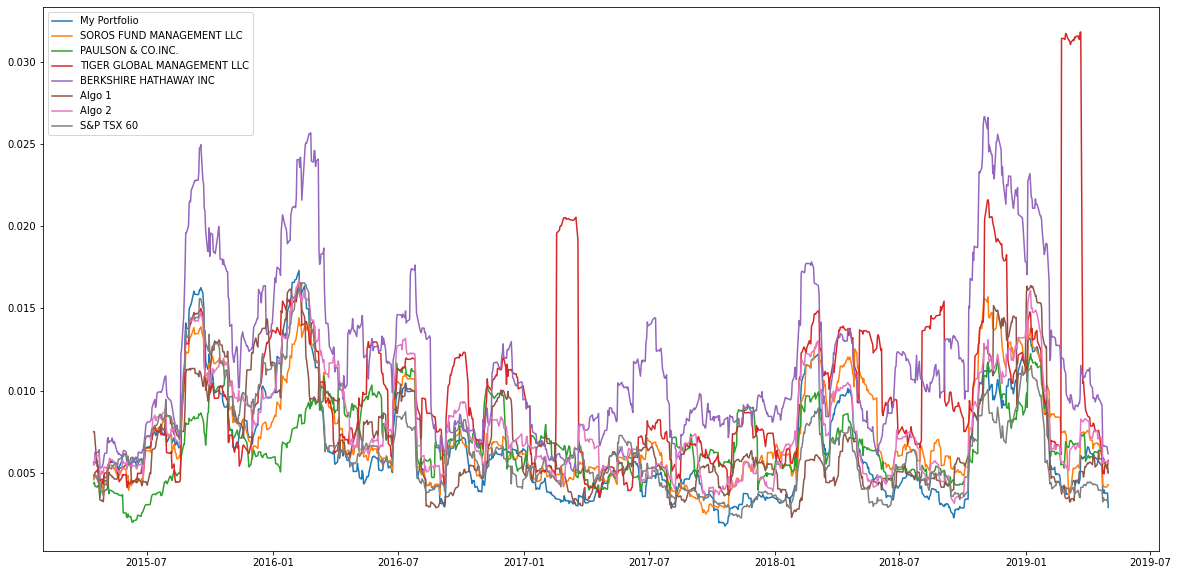

In [408]:
# Calculate rolling standard deviation

df_rolling_21_day_std_deviations = df_consolidated_returns_incl_my_portfolio.rolling(window=21).std()

# Plot the rolling standard deviation
df_rolling_21_day_std_deviations.plot(figsize=(20,10))



### Calculate and plot the correlation

In [409]:
# Calculate and plot the correlation
df_correlation = df_consolidated_returns_incl_my_portfolio.corr()

# Display the correlation matrix
print(f"The correlation matrix for the portfolios:\n")
df_correlation

The correlation matrix for the portfolios:



,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
My Portfolio,1.000000,0.791251,0.582438,0.566446,0.718118,0.297707,0.844869,0.823078
SOROS FUND MANAGEMENT LLC,0.791251,1.000000,0.694421,0.556272,0.753447,0.318340,0.825601,0.672749
PAULSON & CO.INC.,0.582438,0.694421,1.000000,0.428472,0.539541,0.270693,0.672653,0.485362
TIGER GLOBAL MANAGEMENT LLC,0.566446,0.556272,0.428472,1.000000,0.420743,0.160516,0.502049,0.438651
BERKSHIRE HATHAWAY INC,0.718118,0.753447,0.539541,0.420743,1.000000,0.288056,0.689717,0.564348
Algo 1,0.297707,0.318340,0.270693,0.160516,0.288056,1.000000,0.287748,0.313657
Algo 2,0.844869,0.825601,0.672653,0.502049,0.689717,0.287748,1.000000,0.737801
S&P TSX 60,0.823078,0.672749,0.485362,0.438651,0.564348,0.313657,0.737801,1.000000


Text(0.5, 1.0, 'Correlation')

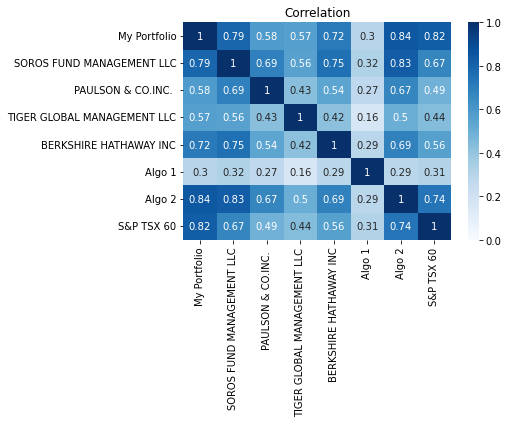

In [410]:
sns.heatmap(df_correlation, vmin=0, vmax=1, cmap="Blues", annot=True).set_title("Correlation")

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

My Portfolio: 
		 0.00004135775372641746
SOROS FUND MANAGEMENT LLC: 
		 0.00003703813926800931
PAULSON & CO.INC. : 
		 0.00002388769329478659
TIGER GLOBAL MANAGEMENT LLC: 
		 0.00003363617931547314
BERKSHIRE HATHAWAY INC: 
		 0.00005091546848470049
Algo 1: 
		 0.00001678030372454606
Algo 2: 
		 0.00004317610683009007
S&P TSX 60: 
		 0.00004930308469619302
Date
2015-03-03   NaN
2015-03-04   NaN
2015-03-05   NaN
2015-03-06   NaN
2015-03-09   NaN
Name: S&P TSX 60, dtype: float64


<AxesSubplot:title={'center':'My Portfolio Beta'}, xlabel='Date'>

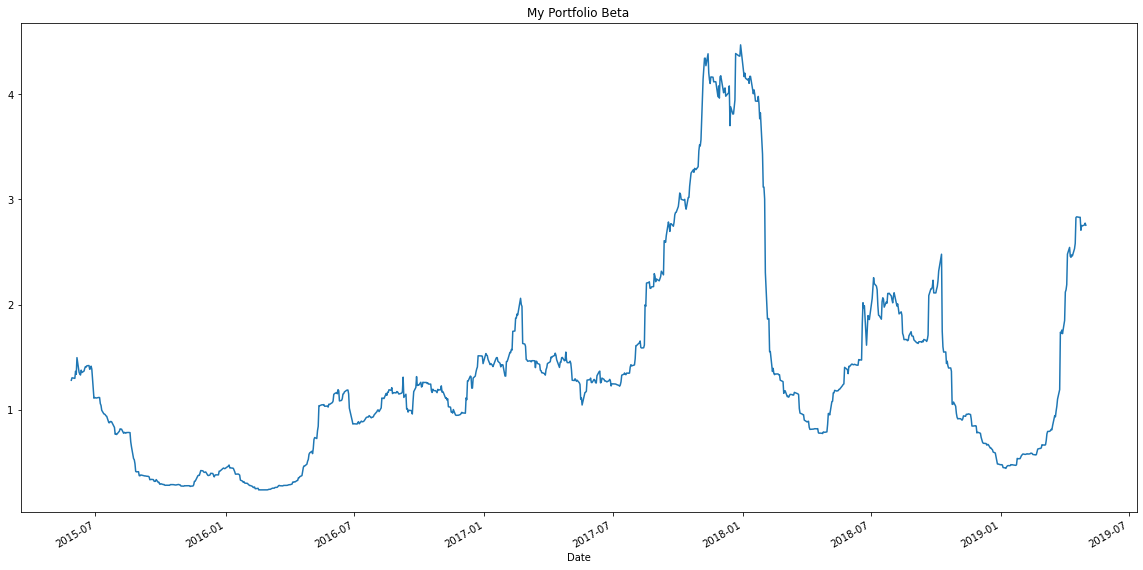

In [411]:
# Calculate and plot Beta

# Calculate covariance of all portfolio
df_covariances = []
for i in range(0,len(df_consolidated_returns_incl_my_portfolio.columns)):
    df_covariances.append(df_consolidated_returns_incl_my_portfolio[df_consolidated_returns_incl_my_portfolio.columns[i]].cov(df_consolidated_returns_incl_my_portfolio['S&P TSX 60']))

#Printing covariances
j = 0
for i in df_covariances:
    print(f"{df_consolidated_returns_incl_my_portfolio.columns[j]}: \n\t\t {i:.20f}")
    j = j+ 1


# Calculate variance of S&P TSX
df_variance_sp_tsx_60 = df_consolidated['S&P TSX 60'].rolling(window=60).var()
if (debugging_toggle):
    print(df_variance_sp_tsx_60.head())

# Computing beta
df_beta = df_covariances[0]/df_variance_sp_tsx_60


# Plot beta trend
df_beta.plot(title="My Portfolio Beta",figsize=(20, 10))





### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [412]:
# Calculate Annualized Sharpe Ratios
#Here we treat the risk-free return to be zero!
sharpe_ratios = ((df_consolidated_returns_incl_my_portfolio.mean() - 0) * 252) / (df_consolidated_returns_incl_my_portfolio.std() * np.sqrt(252))

sharpe_ratios

My Portfolio                   0.670315
SOROS FUND MANAGEMENT LLC      0.332917
PAULSON & CO.INC.             -0.532204
TIGER GLOBAL MANAGEMENT LLC   -0.108242
BERKSHIRE HATHAWAY INC         0.470942
Algo 1                         1.594404
Algo 2                         0.486058
S&P TSX 60                     0.352988
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharp Ratios Including My Portfolio'}>

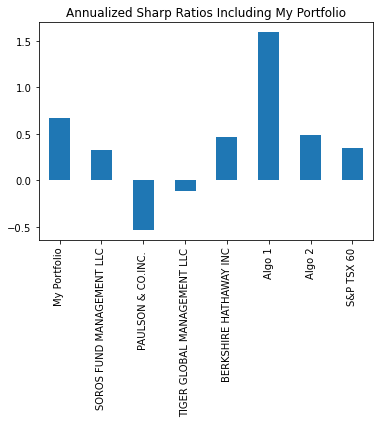

In [413]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Annualized Sharp Ratios Including My Portfolio")

### How does your portfolio do?

Since the Sharpe Ration of my Selected Portfolio of 3 stocks is lower than 1 - it is considered Sub-otimal.